In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('breast_cancer_wiscousin.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.drop('id', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [6]:
df.diagnosis = df.diagnosis.map({'M': 1, 'B':0})

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [20]:
cols_mean= list(df.columns[1:10])


In [34]:
cols_se= list(df.columns[11:20])

In [35]:
cols_worst=list(df.columns[21:30])

In [30]:
df[cols_mean].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


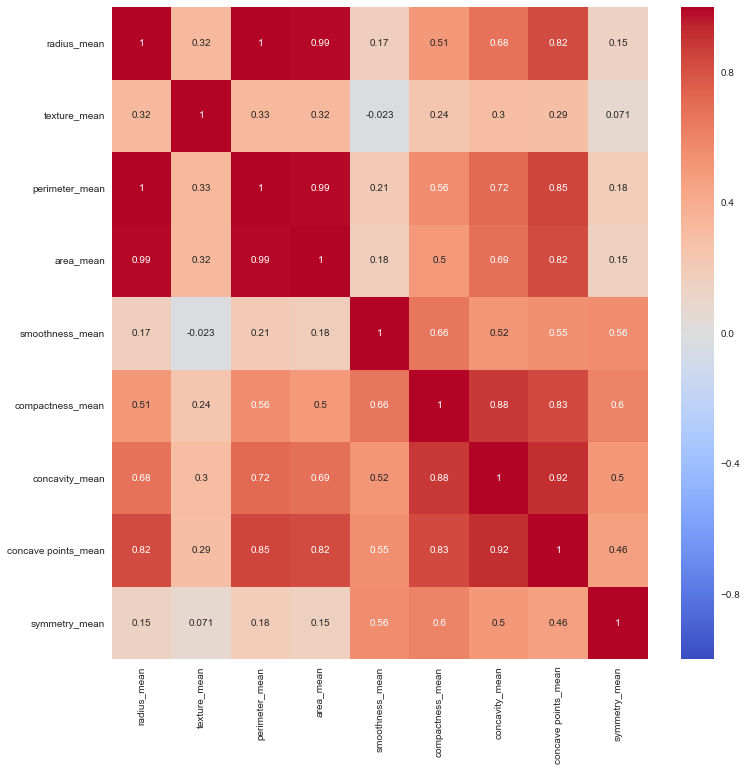

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df[cols_mean].corr(), cmap= 'coolwarm', annot=True)

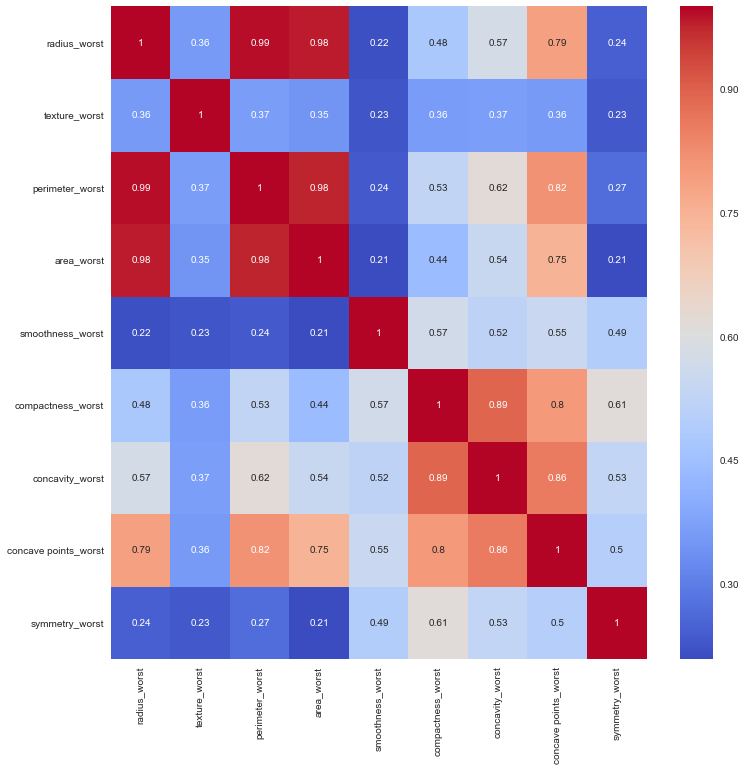

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(df[cols_worst].corr(), cmap= 'coolwarm', annot=True)

In [38]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model


C:\Users\shauna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
10,1,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452


In [47]:
from sklearn.svm import SVC

In [48]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

svc_model = SVC()

In [49]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
predictions = svc_model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(confusion_matrix(y_test,predictions))

[[107   0]
 [ 64   0]]


In [53]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.63      1.00      0.77       107
          1       0.00      0.00      0.00        64

avg / total       0.39      0.63      0.48       171



C:\Users\shauna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.63      1.00      0.77       107
          1       0.00      0.00      0.00        64

avg / total       0.39      0.63      0.48       171



C:\Users\shauna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
        param_grid = {'C': [1000], 'gamma': [0.001]}           

In [2]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [62]:
grid_predictions = grid.predict(X_test)

In [63]:
# use gamma = 1000, much better result
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       107
          1       0.91      0.91      0.91        64

avg / total       0.93      0.93      0.93       171



In [65]:
lr = LogisticRegression()


In [66]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
lr_pred =lr.predict(X_test)

In [68]:
print(classification_report(y_test,lr_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       107
          1       0.98      0.91      0.94        64

avg / total       0.96      0.96      0.96       171



In [70]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
rf_prediction = model.predict(X_test)
metrics.accuracy_score(rf_prediction,y_test)

0.94152046783625731

In [71]:
#PCA : principal comp Analysis
from sklearn.preprocessing import StandardScaler


In [95]:
cancer_obs = df.iloc[:,1:]

In [96]:
scaler = StandardScaler()
scaler.fit(cancer_obs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
scaled_data = scaler.transform(cancer_obs)

In [98]:
from sklearn.decomposition import PCA


In [117]:
pca = PCA(n_components=3)

In [118]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [119]:
scaled_data.shape

(569, 30)

In [120]:
x_pca = pca.transform(scaled_data)

In [121]:
x_pca.shape

(569, 3)

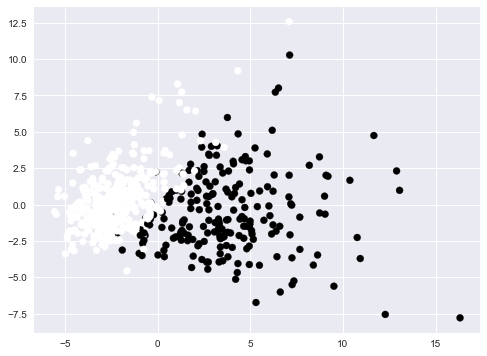

In [122]:
plt.figure(figsize= (8, 6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df.diagnosis )

In [123]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.1518916 ,  0.06016535, -0.03476751,  0.19034877,  0.36657546,
        -0.10555215,  0.08997968, -0.08945724, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032157,  0.183848  ,  0.28009204,
        -0.21986637, -0.0454673 , -0.19987843, -0.21935186,  0.17230436,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853122,  0.06454988, -0.00931421,  0.02869952, -0.10429183,
        -0.07409165,  0.00273369, -0.02556362, -0

In [107]:
df.columns[1:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [128]:
df_comp =  pd.DataFrame(pca.components_, columns =df.columns[1:])

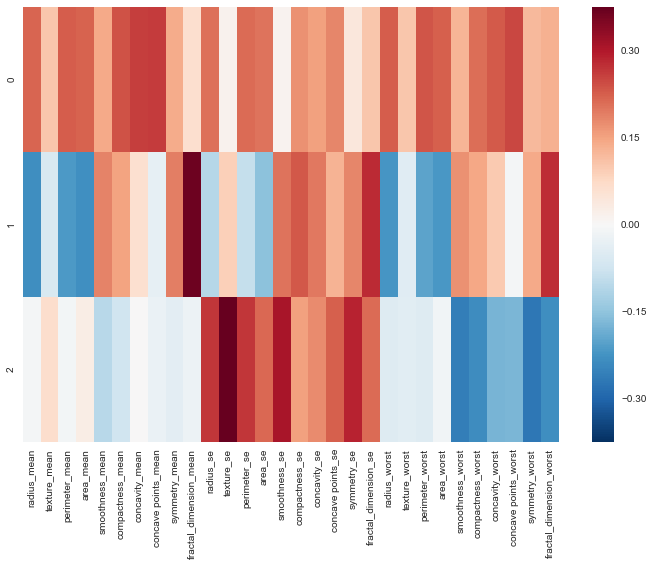

In [129]:
plt.figure(figsize= (12, 8))
sns.heatmap(df_comp)

In [124]:
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

In [125]:
dimensions

['Dimension 1', 'Dimension 2', 'Dimension 3']

In [127]:
# Dimension indexing
# dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4), columns = cancer_obs.keys())
components.index = dimensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

print(pd.concat([variance_ratios, components], axis = 1))

             Explained Variance  radius_mean  texture_mean  perimeter_mean  \
Dimension 1              0.4427       0.2189        0.1037          0.2275   
Dimension 2              0.1897      -0.2339       -0.0597         -0.2152   
Dimension 3              0.0939      -0.0085        0.0645         -0.0093   

             area_mean  smoothness_mean  compactness_mean  concavity_mean  \
Dimension 1     0.2210           0.1426            0.2393          0.2584   
Dimension 2    -0.2311           0.1861            0.1519          0.0602   
Dimension 3     0.0287          -0.1043           -0.0741          0.0027   

             concave points_mean  symmetry_mean           ...             \
Dimension 1               0.2609         0.1382           ...              
Dimension 2              -0.0348         0.1903           ...              
Dimension 3              -0.0256        -0.0402           ...              

             radius_worst  texture_worst  perimeter_worst  area_worst  \
